<a href="https://colab.research.google.com/github/dantrainor9/food_sales_predictions/blob/main/Food_Sales_Predictions_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/MyDrive/CodingDojo Data Science Bootcamp/01 Week 1 Foundations of Python/sales_predictions.csv'
df = pd.read_csv(filename)

Mounted at /content/drive


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [ ]:
# I chose to fill missing values for Item Weight using an aggregate function as item weight and outlet size can be highly variable, and I do not want to skew my data unintentionally
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace = True)
#For the categorical column Outlet Size I decided to fill all with "Medium", the categorical "mean"
df['Outlet_Size'].fillna(value = 'Medium', inplace = True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [ ]:
df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)
df['Item_Fat_Content'].replace(['regular', 'reg'], 'Regular', inplace=True)
df['Outlet_Size'].replace('High', 'Large', inplace=True)

In [ ]:
print('Item Weight')
print(df['Item_Weight'].describe())

print('Item Visibility')
print(df['Item_Visibility'].describe())

print('Item MRP')
print(df['Item_MRP'].describe())

print('Outlet Establishment Year')
print(df['Outlet_Establishment_Year'].describe())

print('Item Outlet Sales')
print(df['Item_Outlet_Sales'].describe())

Item Weight
count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64
Item Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64
Item MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64
Outlet Establishment Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64
Item Outlet Sales
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%     

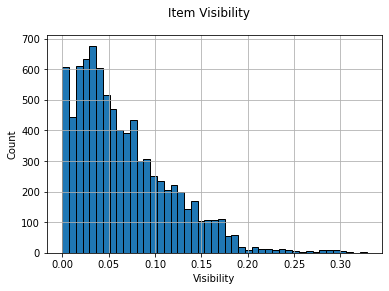

In [ ]:
df['Item_Visibility'].hist(bins=45, edgecolor='black')
plt.suptitle('Item Visibility')
plt.ylabel('Count')
plt.xlabel('Visibility');

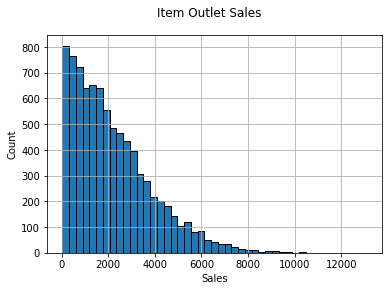

In [ ]:
df['Item_Outlet_Sales'].hist(bins=45, edgecolor='black')
plt.suptitle('Item Outlet Sales')
plt.ylabel('Count')
plt.xlabel('Sales');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


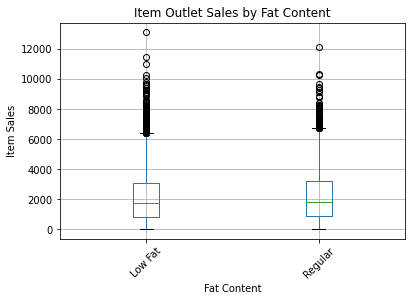

In [ ]:
boxplot = df.boxplot(column='Item_Outlet_Sales', by='Item_Fat_Content')
plt.suptitle('')
plt.title('Item Outlet Sales by Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Item Sales')
plt.xticks(rotation=45);

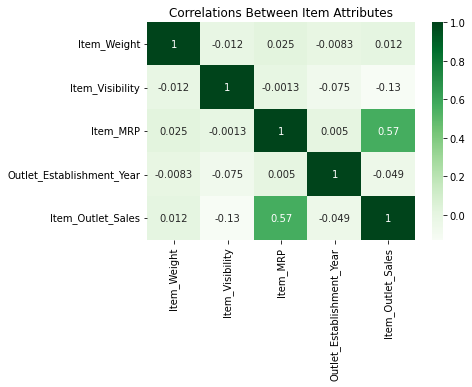

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)
plt.title('Correlations Between Item Attributes');

This graph shows that while previous graphs suggest there may be a relationship (see the similarities between the two above histograms) there may be no actual correlation, as displayed in the above heatmap. The only correlation between columns in the data set is between Item MRP and Item Outlet Sales - this correlation is somewhat reassuring as it indicates the MRP estimates are getting some things right, but a moderate correlation of 0.57 leaves room for improvement.

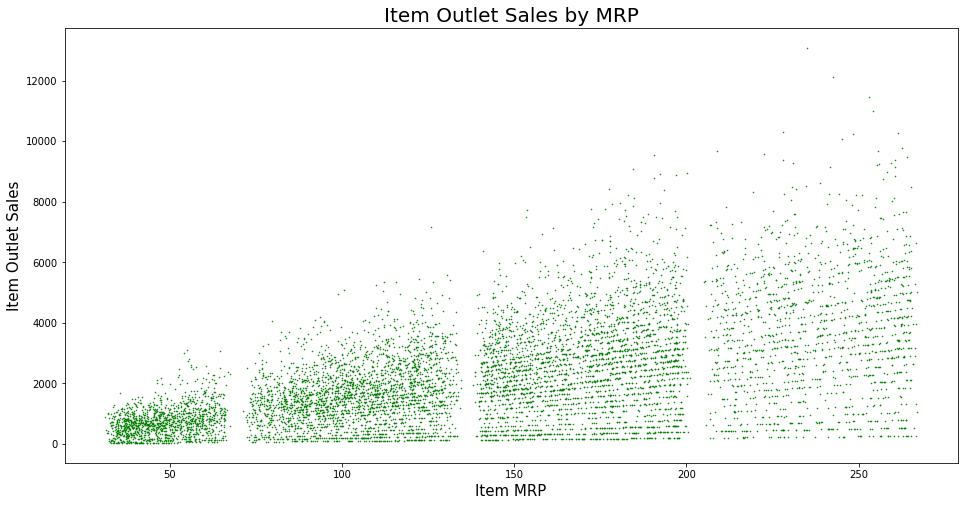

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'], s=.3, c='g')
plt.title('Item Outlet Sales by MRP', fontsize=20)
plt.xlabel('Item MRP', fontsize=15)
plt.ylabel('Item Outlet Sales', fontsize=15);